<div class="alert alert-block alert-success">
<h1><b>PROJET 8 - </b>Participez à la conception d'une voiture autonome</h1>
<h2>Notebook Scripts</h2></div>

<img src="img_notebook/future_vision_transport.png" width="250" height="250">

## Table of Contents<hr>
[INTRODUCTION & PRESENTATION](#section_0)<br>
[A - IMPORTATIONS & DATA COLLECTION](#section_0A)<br>
[B - DATA DESCRIPTION](#section_0B)<br>
[C - PERFORMANCE METRICS DEFINITION](#section_0C)<br>
&emsp;[1 - Intersection over Union (IoU)](#section_0C1)<br>
&emsp;[2 - Dice Coefficient](#section_0C2)<br>
&emsp;[3 - Metrics calculation function](#section_0C3)<br>
&emsp;[4 - Training time](#section_0C4)<br><hr>
[PART 1 - DATA PREPARATION](#section_1)<br>
[A - DATA AUGMENTATION](#section_1A)<br>
&emsp;[1 - OpenCV](#section_1A1)<br>
&emsp;[2 - imgaug](#section_1A2)<br>
&emsp;[3 - Augmentor](#section_1A3)<br>
&emsp;[4 - Albumentations](#section_1A4)<br>
[B - DATA GENERATOR](#section_1B)<br>
[C - FINAL DATASETS FOR MODELLING](#section_1C)<br><hr>
[PART 2 - CONVOLUTIONAL NEURAL NETWORKS MODELS](#section_2)<br>
[A - U-NET MINI (unet_mini) - BASE MODEL](#section_2A)<br>
&emsp;[1 - Building the model](#section_2A1)<br>
&emsp;[2 - Training the model](#section_2A2)<br>
&emsp;[3 - Making mask predictions](#section_2A3)<br>
[B - U-NET (unet)](#section_2B)<br>
&emsp;[1 - Building the model](#section_2B1)<br>
&emsp;[2 - Training the model](#section_2B2)<br>
&emsp;[3 - Making mask predictions](#section_2B3)<br>
[C - VGG-16 U-NET (vgg_unet)](#section_2C)<br>
&emsp;[1 - Building the model](#section_2C1)<br>
&emsp;[2 - Training the model](#section_2C2)<br>
&emsp;[3 - Making mask predictions](#section_2C3)<br>
[D -  VGG-16 FCN32 (fcn_32_vgg)](#section_2D)<br>
&emsp;[1 - Building the model](#section_2D1)<br>
&emsp;[2 - Training the model](#section_2D2)<br>
&emsp;[3 - Making mask predictions](#section_2D3)<br>
[E -  VGG-16 PSPNet (vgg_pspnet)](#section_2E)<br>
&emsp;[1 - Building the model](#section_2E1)<br>
&emsp;[2 - Training the model](#section_2E2)<br>
&emsp;[3 - Making mask predictions](#section_2E3)<br>
[F -  VGG-16 Segnet (vgg_segnet)](#section_2F)<br>
&emsp;[1 - Building the model](#section_2F1)<br>
&emsp;[2 - Training the model](#section_2F2)<br>
&emsp;[3 - Making mask predictions](#section_2F3)<br>
[G -  Resnet-50 U-NET (resnet50_unet)](#section_2G)<br>
&emsp;[1 - Building the model](#section_2G1)<br>
&emsp;[2 - Training the model](#section_2G2)<br>
&emsp;[3 - Making mask predictions](#section_2G3)<br><hr>
[PART 3 - ???????](#section_3)<br>
[A - HYPERPARAMETER TUNING](#section_3A)<br>
[B - MODELS PERFORMANCE EVALUATION](#section_3B)<br><hr>
[CONCLUSION](#section_00)<br>

<h2><div class="alert alert-block alert-success" id="section_0">
INTRODUCTION & PRESENTATION</div></h2>

<b>Future Vision Transport</b> is a company that designs on-board computer vision systems for <b>autonomous vehicles</b>.

In the embedded computer vision system, we need to tackle the <b>image segmentation</b> part, which is fed by the image processing block and which feeds the decision system.

For this <b>semantic segmentation computer vision</b> challenge, we will use the <b>Cityscapes dataset</b>.<br> which focuses on semantic understanding of urban street scenes.<br>
This present a new large-scale dataset that contains a diverse set of stereo video sequences recorded in street scenes from 50 different cities, with high quality pixel-level annotations of <b>5 000 frames</b> in addition to a larger set of 20 000 weakly annotated frames.

We will group the classes into <b>8 main categories</b>, as follows.

#### • Class Definitions

|Group|Classes|
|---|---|
|<b>flat</b>|road · sidewalk · parking+ · rail track+|
|<b>human</b>|person* · rider*|
|<b>vehicle</b>|car* · truck* · bus* · on rails* · motorcycle* · bicycle* · caravan*+ · trailer*+|
|<b>construction</b>|building · wall · fence · guard rail+ · bridge+ · tunnel+|
|<b>object</b>|pole · pole group+ · traffic sign · traffic light|
|<b>nature</b>|vegetation · terrain|
|<b>sky</b>|sky|
|<b>void</b>|ground+ · dynamic+ · static+|

  \* *Single instance annotations are available. However, if the boundary between such instances cannot be clearly seen, the whole crowd/group is labeled together and annotated as group, e.g. car group.*
  <br>\+ *This label is not included in any evaluation and treated as void (or in the case of license plate as the vehicle mounted on).*

### What is semantic segmentation?

There are three levels in the image analysis: Classification, Object detection and Segmentation, which identifies parts of the image, so it can understand what object they belong to.

Image segmentation has many applications in medical imaging, self-driving cars and satellite imaging, just to name a few.

Semantic segmentation is the task of classifying each pixel in an image from a predefined set of classes or a pixelwise classification of a given image.

These classes can be interpreted in a semantic way and correspond to real-world categories. You could isolate
all the pixels associated with a car and color them green.

Applications examples: • Face recognition, • Number plate identification, • Satellite image analysis, • Autonomous vehicles use it to understand their surroundings.

deep learning has worked comprehensively better than the existing techniques and has become a norm now when dealing with Semantic Segmentation. Thus, we will train various deep learning semantic segmentation models, mainly around <b>U-NET</b> with TensorFlow and Keras

Actual contribution to the field has only been achieved very recently, particularly following a revolutionary paper on fully convolutional networks (FCN). It could be said that most state-of-the-art studies are in fact extensions of that same study.

<h3><div class="alert alert-block alert-info" id="section_0A">
A - IMPORTATIONS & DATA COLLECTION</div></h3>

In [1]:
%matplotlib inline

# Importation of Python modules and methods.
import os
import random
import time
import warnings
from pprint import pprint
# from IPython.display import HTML, Image

# Importation of Machine Learning libraries.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# import pickle5 as pickle
# import seaborn as sns
from tqdm import tqdm

# Importation of TensorFlow/Keras functions or classes.
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.callbacks import (
    Callback, 
    EarlyStopping, 
    ModelCheckpoint, 
    ReduceLROnPlateau,
    TensorBoard, 
)
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import (
    Activation, 
    BatchNormalization, 
    concatenate, 
    Conv2D,
    Conv2DTranspose, 
    Dropout, 
    Lambda, 
    MaxPooling2D, 
    Permute,
    Reshape, 
    UpSampling2D
)
from tensorflow.keras.losses import binary_crossentropy, BinaryCrossentropy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adadelta, Nadam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model, Sequence

# Importation of Image Augmentation libraries.
# OpenCV-Python
import cv2
# imgaug
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
# Augmentor
import Augmentor
# Albumentations
# from albumentations import (
#     Compose, RandomBrightness, JpegCompression, HueSaturationValue, RandomContrast, 
#     HorizontalFlip, Rotate
# )
import albumentations as A

# from multiclassunet import Unet
# from moviepy.editor import VideoFileClip, ImageSequenceClip

# from dilatednet import DilatedNet

warnings.filterwarnings("ignore")
# os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

<h3><div class="alert alert-block alert-info" id="section_0B">
B - DATA DESCRIPTION</div></h3>

All images are <b>PNG</b> and size <b>2048 x 1024</b>.<br>
For masks, we are going to use the <b>gtFine_color</b> ones.<br>
In total, we have <b>5000 images</b> from different cities.

```
project
│
└───images
│   │
│   └───test
│       └───berlin
│       |   └───berlin_000000_000019_leftImg8bit.png
│       |   └───berlin_000001_000019_leftImg8bit.png
│       |   └───...
│       └───bielefeld
│       └───...
│   └───train
│       └───...
│   └───val 
│       └───...
└───masks
    │
    └───test
        └───berlin
        |   └───berlin_000000_000019_gtFine_color.png
        |   └───berlin_000000_000019_gtFine_instanceIds.png
        |   └───berlin_000000_000019_gtFine_labelIds.png
        |   └───berlin_000000_000019_gtFine_polygons.json
        |   └───...
        └───bielefeld
        └───...
    └───train
        └───...
    └───val 
        └───...
```

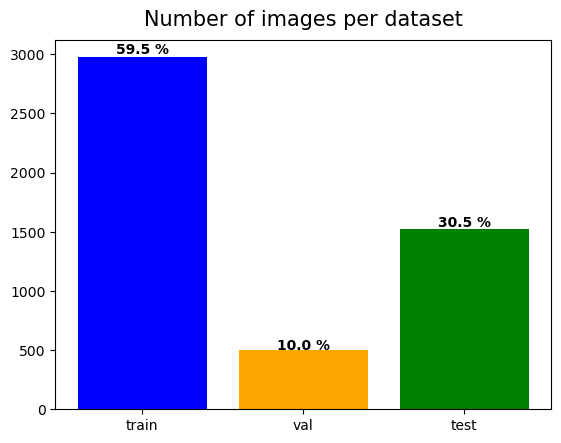

In [2]:
fig, ax = plt.subplots()
images_cat = ['train', 'val', 'test']
images_num = [2975, 500, 1525]
colors_list = ['Blue', 'Orange', 'green']
images = plt.bar(images_cat, images_num, color=colors_list)
for img in images:
    height = img.get_height()
    width = img.get_width()
    x, y = img.get_xy()
    ax.text(x + width / 2, y + height * 1.01,
            s=f"{height * 100 / sum(images_num)} %", 
            ha='center', weight='bold')
plt.title('Number of images per dataset', size=15, pad=10)
plt.show()

In [3]:
cat_dict = {'void': [0, 1, 2, 3, 4, 5, 6], 
            'flat': [7, 8, 9, 10],
            'construction': [11, 12, 13, 14, 15, 16],
            'object': [17, 18, 19, 20],
            'nature': [21, 22],
            'sky': [23],
            'human': [24, 25],
            'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]  # -1 is for the license plate.
           }

In [4]:
# This color map has been used to display the results.
color_map = {
 '0': [0, 0, 0],
 '1': [153, 153, 0],
 '2': [255, 204, 204],
 '3': [255, 0, 127],
 '4': [0, 255, 0],
 '5': [0, 204, 204],
 '6': [255, 0, 0],
 '7': [0, 0, 255]
}

In [5]:
image_dir = 'datasets/images/train/aachen'
mask_dir = 'datasets/masks/train/aachen'
image_list = os.listdir(image_dir)
mask_list = os.listdir(mask_dir)
image_list.sort()
mask_list.sort()
print('Elements in image_list:')
pprint(image_list[:8])
print('\nElements in mask_list:')
pprint(mask_list[:8])
mask_color_list = [image for image in mask_list if image.endswith('color.png')]
print('\nColor masks in mask_color_list:')
pprint(mask_color_list[:8])
print(f'\nNumber of images: {len(image_list)}\nNumber of color masks: {len(mask_color_list)}')

# Checking of the number of images and respected color masks.
for i in range(len(image_list)):
    assert image_list[i][:-16] == mask_color_list[i][:-17]
print(f'\n{image_list[5]} \n{mask_color_list[5]}')

Elements in image_list:
['aachen_000000_000019_leftImg8bit.png',
 'aachen_000001_000019_leftImg8bit.png',
 'aachen_000002_000019_leftImg8bit.png',
 'aachen_000003_000019_leftImg8bit.png',
 'aachen_000004_000019_leftImg8bit.png',
 'aachen_000005_000019_leftImg8bit.png',
 'aachen_000006_000019_leftImg8bit.png',
 'aachen_000007_000019_leftImg8bit.png']

Elements in mask_list:
['aachen_000000_000019_gtFine_color.png',
 'aachen_000000_000019_gtFine_instanceIds.png',
 'aachen_000000_000019_gtFine_labelIds.png',
 'aachen_000000_000019_gtFine_polygons.json',
 'aachen_000001_000019_gtFine_color.png',
 'aachen_000001_000019_gtFine_instanceIds.png',
 'aachen_000001_000019_gtFine_labelIds.png',
 'aachen_000001_000019_gtFine_polygons.json']

Color masks in mask_color_list:
['aachen_000000_000019_gtFine_color.png',
 'aachen_000001_000019_gtFine_color.png',
 'aachen_000002_000019_gtFine_color.png',
 'aachen_000003_000019_gtFine_color.png',
 'aachen_000004_000019_gtFine_color.png',
 'aachen_000005_000

Image shape: (1024, 2048, 3)
Mask shape: (1024, 2048)


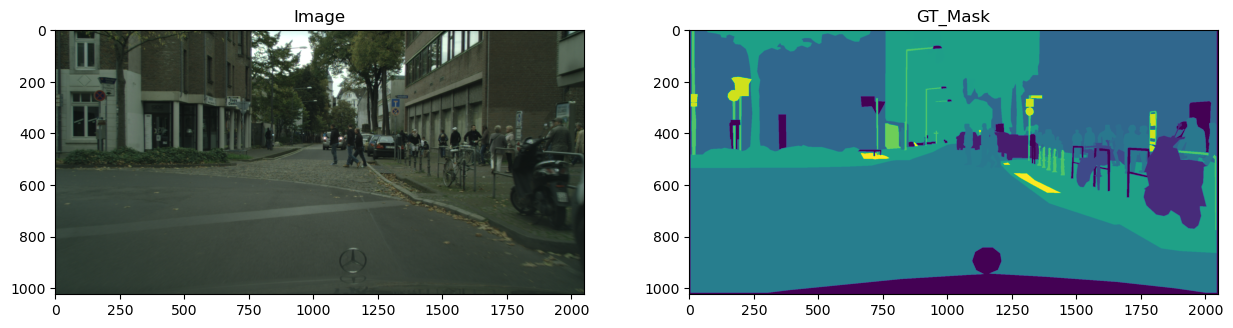

In [6]:
i = 42
test_image = image.img_to_array(
    image.load_img(f'{image_dir}/{image_list[i]}')) / 255.0
test_mask = image.img_to_array(
    image.load_img(f'{mask_dir}/{mask_color_list[i]}', grayscale=True))
test_mask = np.squeeze(test_mask)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(test_image)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('GT_Mask')
ax1.imshow(test_mask)

print(f"\033[34;1mImage shape: {test_image.shape}")
print(f"Mask shape: {test_mask.shape}")

(1024, 2048)


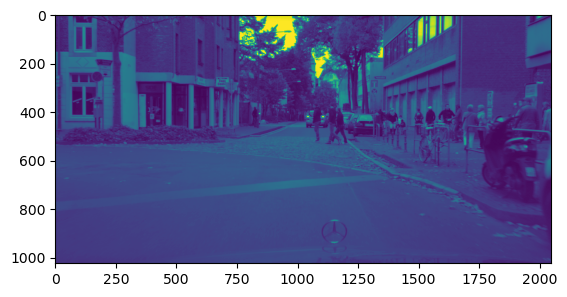

In [7]:
# Converting image to grayscale.
grayscale_img = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
print(grayscale_img.shape)
plt.imshow(grayscale_img)

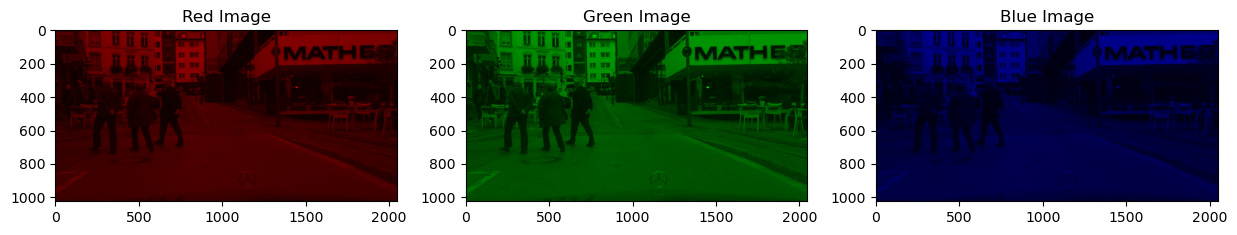

In [8]:
i = 20
test_image = image.img_to_array(
    image.load_img(f'{image_dir}/{image_list[i]}')) / 255.
test_mask = image.img_to_array(
    image.load_img(f'{mask_dir}/{mask_color_list[i]}', grayscale=True))
test_mask = np.squeeze(test_mask)

red_filter = [1, 0, 0]
green_filter = [0, 1, 0]
blue_filter = [0, 0, 1]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 3, 1)
ax.set_title('Red Image')
ax.imshow(test_image * red_filter)

ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title('Green Image')
ax1.imshow(test_image * green_filter)

ax2 = fig.add_subplot(1, 3, 3)
ax2.set_title('Blue Image')
ax2.imshow(test_image * blue_filter)

<h3><div class="alert alert-block alert-info" id="section_0C">
C - PERFORMANCE METRICS DEFINITION</div></h3>

To evaluate the performance of a U-Net (Semantic Segmentation) model, we will use 3 different metrics.

There are two main criteria in evaluating the performance of semantics segmentation.

Defining loss and metric functions are simple with Keras. Simply define a function that takes both the True labels for a given example and the Predicted labels for the same given example.

Dice loss is a metric that measures overlap. More info on optimizing for Dice coefficient (our dice loss) can be found in the paper, where it was introduced.

We use dice loss here because it performs better at class imbalanced problems by design. In addition, maximizing the dice coefficient and IoU metrics are the actual objectives and goals of our segmentation task. Using cross entropy is more of a proxy which is easier to maximize. Instead, we maximize our objective directly.

<h4><div class="alert alert-block alert-warning" id="section_0C1">
1 - Intersection over Union (IoU)</div></h4>

Intersection Over Union, also known as the Jaccard Index, is used for evaluating semantic segmentation models. It is the ratio of the intersection of the pixelwise classification results with the ground truth, to their union.

IoU is the area of overlap between the predicted segmentation and the ground truth divided by the area of union between the predicted segmentation and the ground truth, as shown on the image bellow. This metric ranges from 0–1 (0–100%) with 0 signifying no overlap and 1 signifying perfectly overlapping segmentation.

The Intersection over Union (IoU) or The Jaccard index.

<img src="img_notebook/IoU_formula.png" width="350" height="350">

<img src="img_notebook/IoU.png" width="350" height="350">

<h4><div class="alert alert-block alert-warning" id="section_0C2">
2 - Dice Coefficient</div></h4>

The Sørensen–Dice coefficient or Dice Coefficient is simply the count of the similar pixels (taking intersection, present in both images) in both images we are comparing and multiplied by 2, the total divided by the total pixels in both images.

Dice Coefficient (F1 Score)
To put it simply Dice Coefficient is 2 * the Area of Overlap divided by the total number of pixels in both images.

<img src="img_notebook/Dice_formula.png" width="200" height="200">

<img src="img_notebook/Dice.png" width="300" height="300">

<h4><div class="alert alert-block alert-warning" id="section_0C3">
3 - Metrics calculation function</div></h4>

In [9]:
def seg_metrics(y_true, y_pred, metric_name, smooth=0.001):  # smooth to avoid division by 0.
    """IoU or Dice coefficient calculation."""
    y_pred_f = K.flatten(y_pred)
    y_true_f = K.flatten(y_true)
    intersection = K.sum(y_true_f * y_pred_f)
    if metric_name == 'iou':
        union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
        iou_coef = (intersection + smooth) / (union + smooth)
    if metric_name == 'dice':
        dice_coef = ((2 * intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return iou_coef or dice_coef

In [10]:
# EPS = 1e-12
# def get_iou(gt, pr, n_classes):
#     class_wise = np.zeros(n_classes)
#     for cl in range(n_classes):
#         intersection = np.sum((gt == cl)*(pr == cl))
#         union = np.sum(np.maximum((gt == cl), (pr == cl)))
#         iou = float(intersection)/(union + EPS)
#         class_wise[cl] = iou
#     return class_wise

In [11]:
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coef(y_true, y_pred)
    return loss

Here, we'll use a specialized loss function that combines binary cross entropy and our dice loss.

In [12]:
def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [13]:
##########################################

In [14]:
def seg_metrics(y_true, y_pred, metric_name,
    metric_type='standard', drop_last = True, mean_per_class=False, verbose=False):
    """
    Compute mean metrics of two segmentation masks, via Keras.

    IoU(A,B) = |A & B| / (| A U B|)
    Dice(A,B) = 2*|A & B| / (|A| + |B|)

    Args:
        y_true: true masks, one-hot encoded.
        y_pred: predicted masks, either softmax outputs, or one-hot encoded.
        metric_name: metric to be computed, either 'iou' or 'dice'.
        metric_type: one of 'standard' (default), 'soft', 'naive'.
          In the standard version, y_pred is one-hot encoded and the mean
          is taken only over classes that are present (in y_true or y_pred).
          The 'soft' version of the metrics are computed without one-hot
          encoding y_pred.
          The 'naive' version return mean metrics where absent classes contribute
          to the class mean as 1.0 (instead of being dropped from the mean).
        drop_last = True: boolean flag to drop last class (usually reserved
          for background class in semantic segmentation)
        mean_per_class = False: return mean along batch axis for each class.
        verbose = False: print intermediate results such as intersection, union
          (as number of pixels).
    Returns:
        IoU/Dice of y_true and y_pred, as a float, unless mean_per_class == True
          in which case it returns the per-class metric, averaged over the batch.

    Inputs are B*W*H*N tensors, with
        B = batch size,
        W = width,
        H = height,
        N = number of classes
    """

    flag_soft = (metric_type == 'soft')
    flag_naive_mean = (metric_type == 'naive')

    # always assume one or more classes
    num_classes = K.shape(y_true)[-1]

    if not flag_soft:
        # get one-hot encoded masks from y_pred (true masks should already be one-hot)
        y_pred = K.one_hot(K.argmax(y_pred), num_classes)
        y_true = K.one_hot(K.argmax(y_true), num_classes)

    # if already one-hot, could have skipped above command
    # keras uses float32 instead of float64, would give error down (but numpy arrays or keras.to_categorical gives float64)
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    # intersection and union shapes are batch_size * n_classes (values = area in pixels)
    axes = (1,2) # W,H axes of each image
    intersection = K.sum(K.abs(y_true * y_pred), axis=axes)
    mask_sum = K.sum(K.abs(y_true), axis=axes) + K.sum(K.abs(y_pred), axis=axes)
    union = mask_sum  - intersection # or, np.logical_or(y_pred, y_true) for one-hot

    smooth = .001
    iou = (intersection + smooth) / (union + smooth)
    dice = 2 * (intersection + smooth)/(mask_sum + smooth)

    metric = {'iou': iou, 'dice': dice}[metric_name]

    # define mask to be 0 when no pixels are present in either y_true or y_pred, 1 otherwise
    mask =  K.cast(K.not_equal(union, 0), 'float32')

    if drop_last:
        metric = metric[:,:-1]
        mask = mask[:,:-1]

    if verbose:
        print('intersection, union')
        print(K.eval(intersection), K.eval(union))
        print(K.eval(intersection/union))

    # return mean metrics: remaining axes are (batch, classes)
    if flag_naive_mean:
        return K.mean(metric)

    # take mean only over non-absent classes
    class_count = K.sum(mask, axis=0)
    non_zero = tf.greater(class_count, 0)
    non_zero_sum = tf.boolean_mask(K.sum(metric * mask, axis=0), non_zero)
    non_zero_count = tf.boolean_mask(class_count, non_zero)

    if verbose:
        print('Counts of inputs with class present, metrics for non-absent classes')
        print(K.eval(class_count), K.eval(non_zero_sum / non_zero_count))

    return K.mean(non_zero_sum / non_zero_count)

def mean_iou(y_true, y_pred, **kwargs):
    """
    Compute mean Intersection over Union of two segmentation masks, via Keras.

    Calls metrics_k(y_true, y_pred, metric_name='iou'), see there for allowed kwargs.
    """
    return seg_metrics(y_true, y_pred, metric_name='iou', **kwargs)

def mean_dice(y_true, y_pred, **kwargs):
    """
    Compute mean Dice coefficient of two segmentation masks, via Keras.

    Calls metrics_k(y_true, y_pred, metric_name='iou'), see there for allowed kwargs.
    """
    return seg_metrics(y_true, y_pred, metric_name='dice', **kwargs)

<h4><div class="alert alert-block alert-warning" id="section_0C4">
4 - Training time</div></h4>

Another performance metric could be the computer time...  

<h2><div class="alert alert-block alert-success" id="section_1">
PART 1 - DATA PREPARATION</div></h2>

In [15]:
# def get_mask(mask_list):
#     for m in tqdm.tqdm(tmask_list):
#         img = image.load_img(f'{train_dir}/{m}', grayscale=True, target_size=(512, 512))
#         img = np.squeeze(image.img_to_array(img))

In [16]:
# def make_mask(img):
#     mask = np.zeros((img.shape[0], img.shape[1], 8))
#     for i in range(-1, 34):
#         if i in cat_dict['void']:
#             mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
#         elif i in cat_dict['flat']:
#             mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
#         elif i in cat_dict['construction']:
#             mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
#         elif i in cat_dict['object']:
#             mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
#         elif i in cat_dict['nature']:
#             mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
#         elif i in cat_dict['sky']:
#             mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
#         elif i in cat_dict['human']:
#             mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
#         elif i in cat_dict['vehicle']:
#             mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))
#     mask = np.resize(mask,(img.shape[0]*img.shape[1], 8))
#     return mask

<h3><div class="alert alert-block alert-info" id="section_1A">
A - DATA AUGMENTATION</div></h3>

Data augmentation is a technique to increase the diversity of the training set by applying random (but realistic) transformations on the images.

At least three data augmentation techniques have been used (e.g. rotation, scale change, noise addition, etc.).<br>
The use of augmentation techniques has improved the performance of the Deep Learning model.<br>
A comparative summary of the performance improvements thanks to the different techniques used has been written in the technical note.

The Deep Learning we will use are heavily dependent on big data to avoid overfittin. As we have limited amount of images for training, validating and testing, we will use some data augmentation techniques.<br>
We could perfom the augmentation as a preprocessing step to have a bigger dataset, but we have been asked to build a scalable, suitable for production at a large scale.<br>
The best way here is to have an online augmentation, that means augmentations applied in mini batches and then to the model. That way, the augmented images are not needed to be saved.

The data augmentation techniques used here could be flipping, rotation, cropping, brightness, scaling, noise addition...

For that, we choose to use 4 different librairies : OpenCV, imgaug, Augmentor and Albumentations.

These libraries performs all sort of image augmentation techniques but we have to use realistic ones for our purpose. For example, I don't think that vertical flipping is right here (if the image is upside down, that means that the car is on the roof !).

<h4><div class="alert alert-block alert-warning" id="section_1A1">
1 - OpenCV</div></h4>

Open source Computer Vision library, with a Python API (OpenCV-Python) is our first choice for image augmentation.

### Flipping

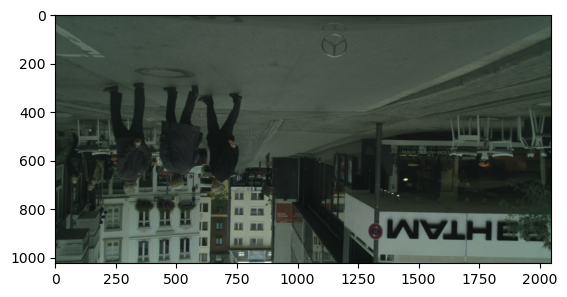

In [17]:
# Vertical flip.
img_flip_v = cv2.flip(test_image, 0)  # Pas d'intérêt pour conduite.
plt.imshow(img_flip_v)

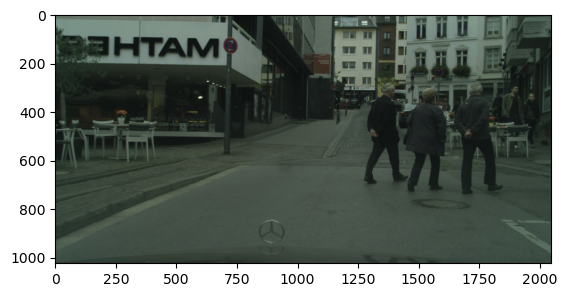

In [18]:
# Horizontal flip.
img_flip_h = cv2.flip(test_image, 1)
plt.imshow(img_flip_h)

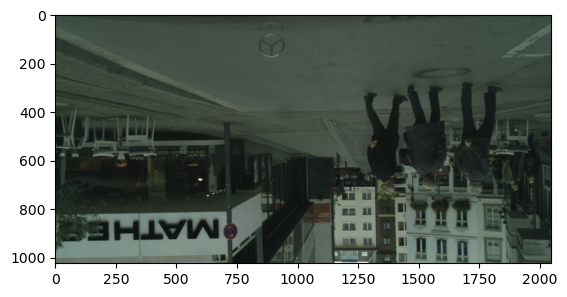

In [19]:
# Vertical and Horizontal flip.
img_flip_vh = cv2.flip(test_image, -1)  # Pas d'intérêt pour conduite.
plt.imshow(img_flip_vh)

### Rotating

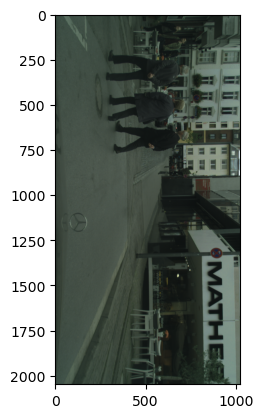

In [20]:
img_rotate_90_clock = cv2.rotate(test_image, cv2.ROTATE_90_CLOCKWISE)
img_rotate_90_counterclock = cv2.rotate(test_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_rotate_180 = cv2.rotate(test_image, cv2.ROTATE_180)
plt.imshow(img_rotate_90_clock)

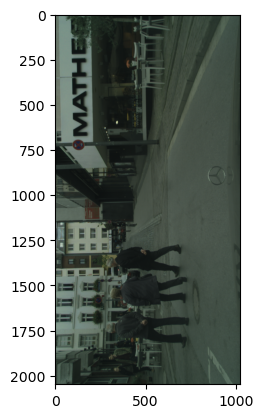

In [21]:
plt.imshow(img_rotate_90_counterclock)

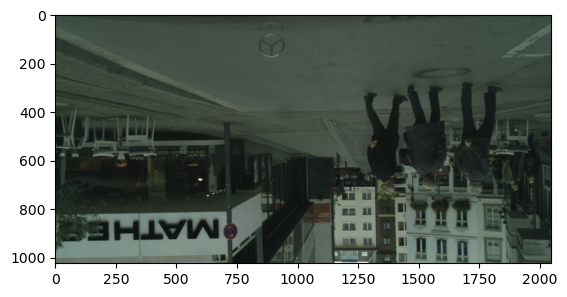

In [22]:
plt.imshow(img_rotate_180)  # Pas d'intérêt ici

### Scaling (or resizing)

(500, 500, 3)


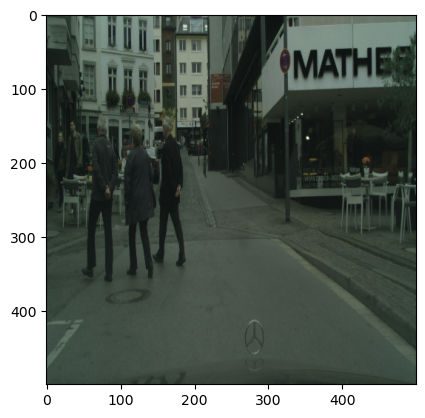

In [23]:
resized_img = cv2.resize(test_image, (500, 500))
print(resized_img.shape)
plt.imshow(resized_img)

### Applying brightness

In [24]:
# gamma = 2
# # invGamma = 1.0 / gamma
# # table = np.array([((i / 255.0) ** invGamma) * 255
# #                  for i in np.arange(0, 256)]).astype("uint8")
# # lookUpTable = np.empty((1, 256), np.uint8)
# for i in range(256):
#     lookUpTable[0,i] = np.clip(
#         pow(i / 255.0, gamma) * 255.0, 0, 255)
# bright_img = cv2.LUT(test_image, lookUpTable)
# plt.imshow(bright_img)

### Cropping

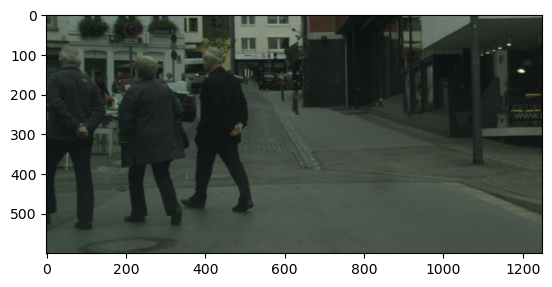

In [25]:
crop_img = test_image[200:800, 250:1500] # bottom, top, left, right
plt.imshow(crop_img)  

### Introducing Gaussian Blur

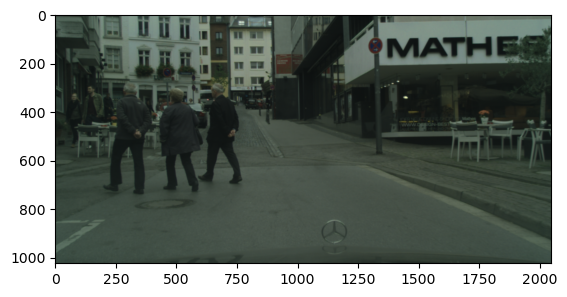

In [26]:
blur_img = cv2.GaussianBlur(test_image, (5, 5), 0)  # blur=0
plt.imshow(blur_img)

<h4><div class="alert alert-block alert-warning" id="section_1A2">
2 - imgaug</div></h4>

imgaug supports a wide range of augmentation techniques, allows to combine these in a pipeline and execute them in random order or on multiple CPU cores.

### Flipping

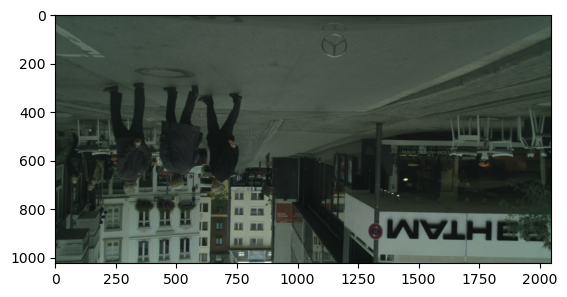

In [27]:
# the 'p' parameter controls the probability of the augmentation being used.
# Vertical flip.
flip_v = iaa.Flipud(p=1.0)
img_flip_v2 = flip_v.augment_image(test_image)
plt.imshow(img_flip_v2)

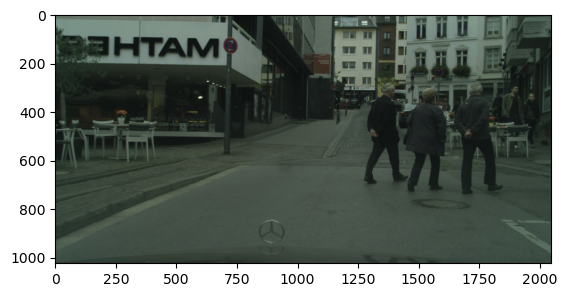

In [28]:
# Horizontal flip.
flip_h = iaa.Fliplr(p=1.0)
img_flip_h2 = flip_h.augment_image(test_image)
plt.imshow(img_flip_h2)

### Rotating

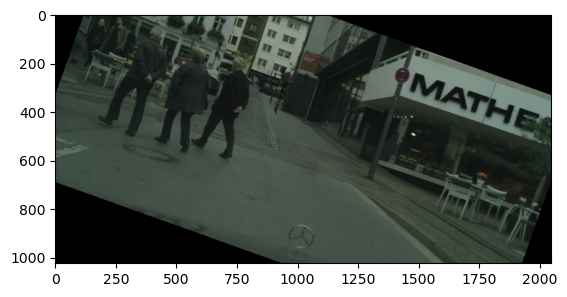

In [29]:
rotate_clock = iaa.Affine(rotate=(-35, 25))  # rotation in degrees.
img_rotate_clock2 = rotate_clock.augment_image(test_image)
plt.imshow(img_rotate_clock2)

### Scaling (or resizing)

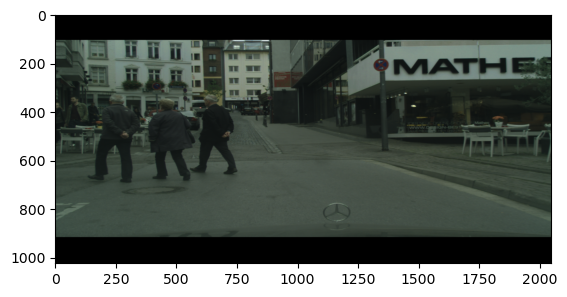

In [30]:
resized_img = iaa.Affine(scale={"x": (1.5, 1.0), "y": (0.5, 1.0)})
resized_img2 = resized_img.augment_image(test_image)
plt.imshow(resized_img2)

### Applying brightness

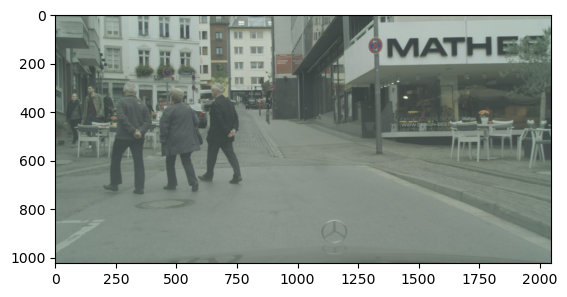

In [31]:
bright_img = iaa.GammaContrast(gamma=0.5)  # bright
bright_img2 = bright_img.augment_image(test_image)
plt.imshow(bright_img2)

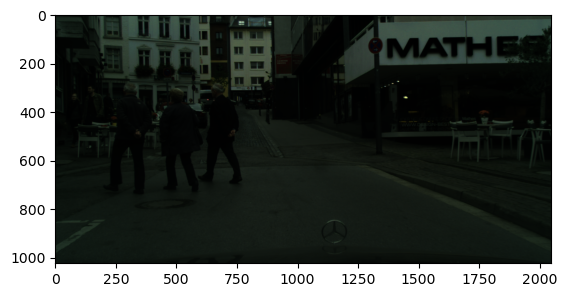

In [32]:
bright_img = iaa.GammaContrast(gamma=2)  # dark
bright_img2 = bright_img.augment_image(test_image)
plt.imshow(bright_img2)

### Cropping

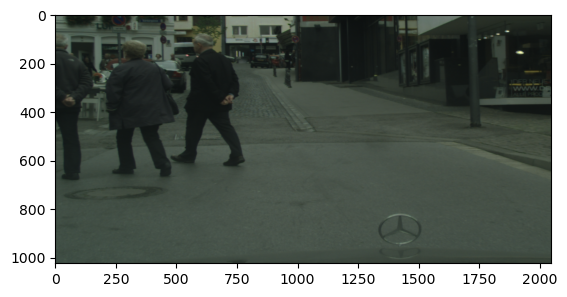

In [33]:
# Removing columns or rows of pixels from the image's side, specified as a fraction of the image size.
crop_img = iaa.Crop(percent=(0, 0.3))
crop_img2 = crop_img.augment_image(test_image)
plt.imshow(crop_img2)

### Adding Noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


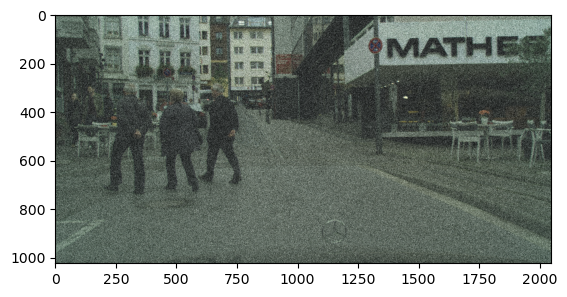

In [34]:
noise_img = iaa.AdditiveGaussianNoise(0.1, 0.2)
noise_img = noise_img.augment_image(test_image)
plt.imshow(noise_img)

In [35]:
# Helper function to display the images in a grid.
def gallery(array, ncols=3):
    """
    Function to arange images into a grid.
    INPUT:
        array - numpy array containing images
        ncols - number of columns in resulting imahe grid
    OUTPUT:
        result - reshaped array into a grid with given number of columns
    """
    nindex, height, width, intensity = array.shape
    nrows = nindex // ncols
    assert nindex == nrows * ncols
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height * nrows, width * ncols, intensity))
    return result

### Augmentation pipeline

The imgaug pipeline is a sequence of steps that can be applied in a fixed or random order. This also gives the flexibility to apply certain transformations to a few images and other transformations to other images. Here, we are applying the flip, sharpen, crop, etc., transformations on some of the images. The blur and affine transformations will be applied sometimes and all these transformations will be applied in random order.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Augmentation  examples')

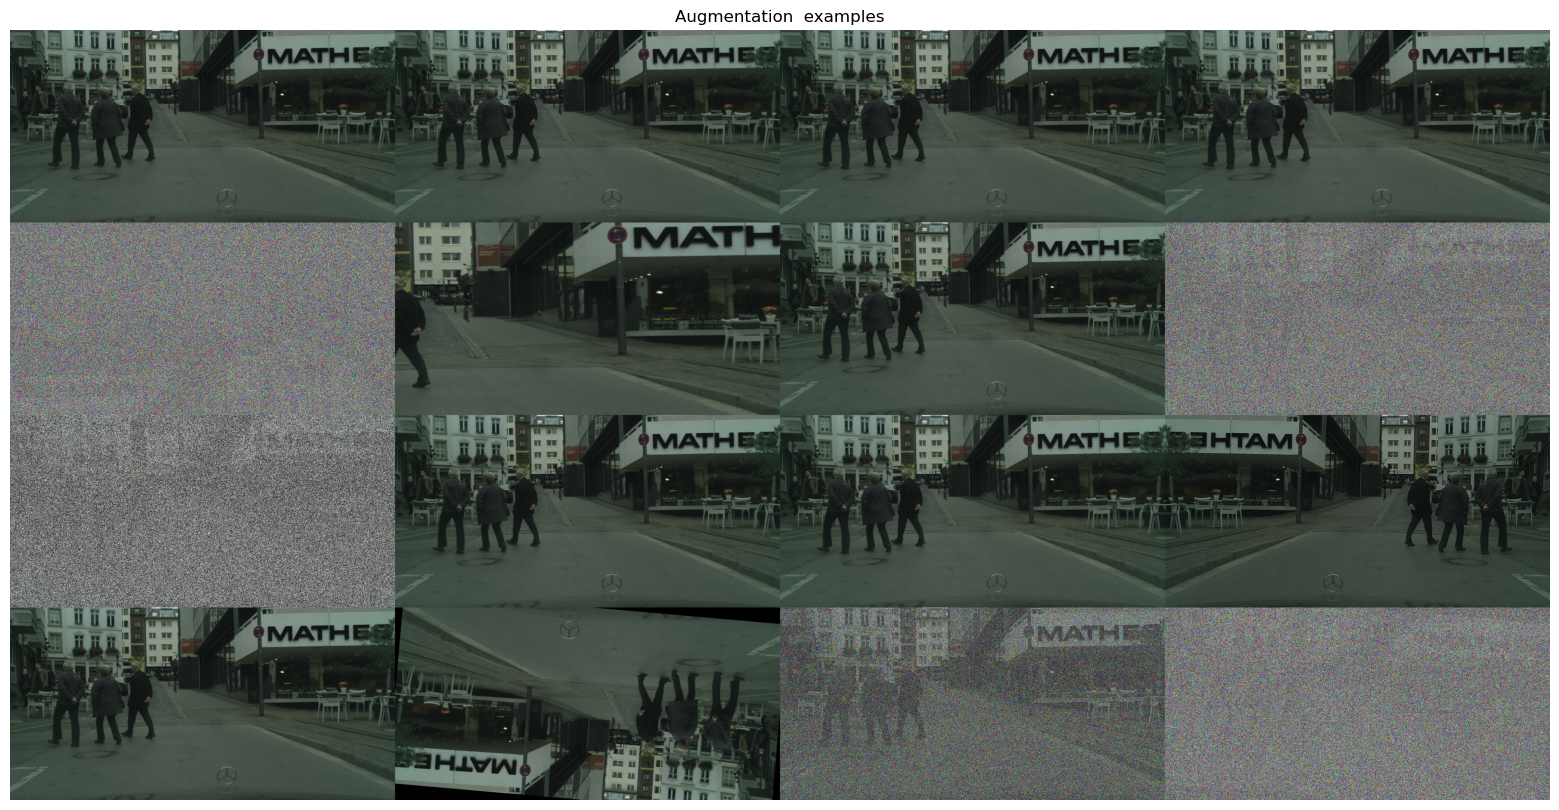

In [36]:
# Defining a pipeline.
# The example has been taken from the documentation
aug_pipeline = iaa.Sequential([
    iaa.SomeOf((0,3),[
        iaa.Fliplr(1.0), # horizontally flip
        iaa.Flipud(1.0),# Vertical flip
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
        iaa.Crop(percent=(0, 0.4)),
        iaa.Sometimes(0.5, iaa.Affine(rotate=5)),
        iaa.Sometimes( 0.5,iaa.GaussianBlur(sigma=(0, 0.5))),
        iaa.AdditiveGaussianNoise(
            loc=0, scale=(0.0, 0.02 * 255), per_channel=0.5)])],
    random_order=True) # apply the augmentations in random order

# apply augmentation pipeline to sample image
images_aug = np.array([aug_pipeline.augment_image(test_image) 
                       for _ in range(16)])

# visualize the augmented images
plt.figure(figsize=(30, 10))
plt.axis('off')
plt.imshow(gallery(images_aug, ncols = 4))
plt.title('Augmentation  examples')

<h4><div class="alert alert-block alert-warning" id="section_1A3">
3 - Augmentor</div></h4>

Augmentor is a Python package designed primarily for data augmentation, but will also incorporate basic image pre-processing functionality.

In [37]:
p = Augmentor.Pipeline('datasets/images/train/aachen', 
                       output_directory='../../aug_dataset/train/aachen')

Initialised with 174 image(s) found.
Output directory set to datasets/images/train/aachen/../../aug_dataset/train/aachen.

In [38]:
p.ground_truth('datasets/masks/train/aachen')
p.rotate(probability=1, max_left_rotation=10, max_right_rotation=10)
p.flip_left_right(probability=0.5)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.skew(probability=0.5, magnitude=0.5)
p.skew_tilt(probability=0.5, magnitude=0.5)
p.random_distortion(probability=0.5,grid_height=4, 
                    grid_width=4, magnitude=4)
p.shear(probability=0.5, max_shear_left=10, max_shear_right=10)
p.gaussian_distortion(probability=0.5, corner='bell', 
                      method='in', grid_height=4, 
                      grid_width=4, magnitude=4)
p.skew_top_bottom(probability=0.5, magnitude=.5)
p.skew_left_right(probability=0.5, magnitude=.5)
p.skew_corner(probability=0.5, magnitude=.5)
p.resize(probability=1,width=256, height=256)

0 ground truth image(s) found.


In [39]:
p.sample(10)

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x177651C60>: 100%|█| 10/10 [00:00<0


<h4><div class="alert alert-block alert-warning" id="section_1A4">
4 - Albumentations</div></h4>

Albumentations is a fast image augmentation library and easy to use wrapper around other libraries. It is based on numpy, OpenCV, imgaug picking the best from each of them.<br>
This library includes over 70 different augmentations for creating new training samples from existing data.

Text(0.5, 1.0, 'Augmentation examples')

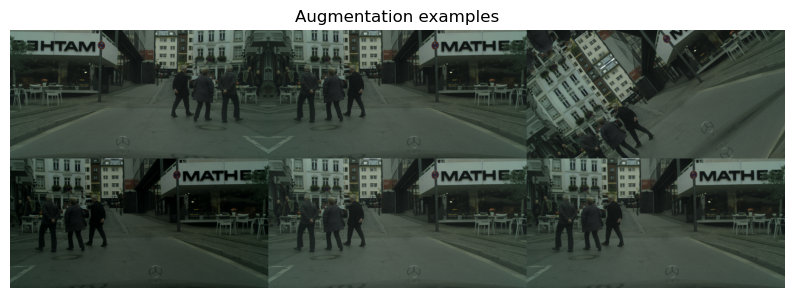

In [40]:
# the 'p' parameter controls the probability of the augmentation being used.
# initialize augmentations
horizontal_flip = A.HorizontalFlip(p=1)
rotate = A.ShiftScaleRotate(p=1)
gaus_noise = A.GaussNoise() # gaussian noise
bright_contrast = A.RandomBrightnessContrast(p=1) # random brightness and contrast
gamma = A.RandomGamma(p=1) # random gamma
blur = A.Blur()

# apply augmentations to images
img_flip = horizontal_flip(image=test_image)
img_gaus = gaus_noise(image=test_image)
img_rotate = rotate(image=test_image)
img_bc = bright_contrast(image=test_image)
img_gamma = gamma(image=test_image)
img_blur = blur(image=test_image)

# access the augmented image by 'image' key
img_list = [img_flip['image'],img_gaus['image'], 
            img_rotate['image'], img_bc['image'], 
            img_gamma['image'], img_blur['image']]

# visualize the augmented images
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(gallery(np.array(img_list), ncols=3))
plt.title('Augmentation examples')

In [41]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

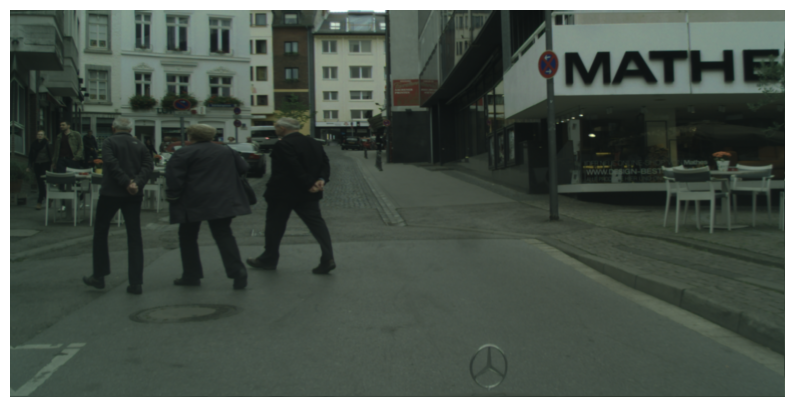

In [42]:
# Augmentation pipeline.
# Creating a Compose instance, providing a list of augmentations as an argument to the class.
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, 
                       scale_limit=0.50, 
                       rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion()])
# random.seed(20) 
augmented_image = transform(image=test_image)['image']
visualize(augmented_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


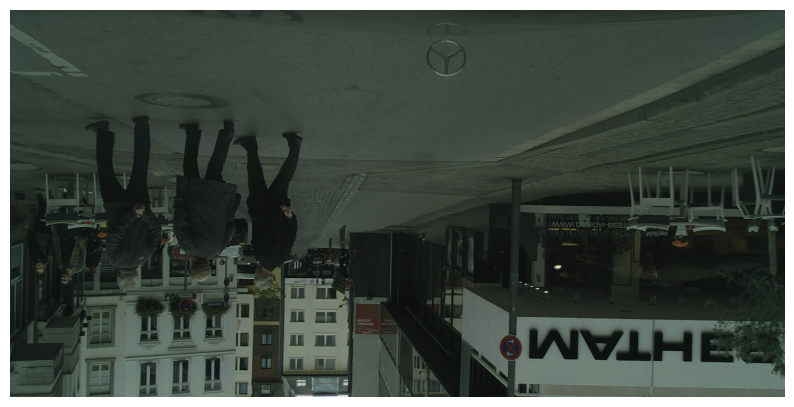

In [44]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(), A.GaussNoise()], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2), A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, 
                           scale_limit=0.2, 
                           rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3)], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast()], p=0.3),
        A.HueSaturationValue(p=0.3)])
# random.seed(20) 
augmented_image = transform(image=test_image)['image']
visualize(augmented_image)

<h3><div class="alert alert-block alert-info" id="section_1B">
B - DATA GENERATOR</div></h3>

The manipulation of a large data set is carried out if:<br>
• A data generator allowing the processing of images on several computing cores has been developed and tested.<br>
• the data generator was written in the form of a python class.<br>
• the data generator script is fully automated.

In [45]:
np.random.seed = 52
IMG_HEIGHT = 1024
IMG_WIDTH = 2048
IMG_CHANNELS = 3
train_path = "datasets/images/train/"
train_ids = next(os.walk(train_path))[1]
x_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = train_path + id_
    img = cv2.imread(path + '/images/' +'.png')[:, :, :IMG_CHANNELS]
    X_train[n] = img
X_train

  0%|                                                                   | 0/18 [00:00<?, ?it/s][ WARN:0@122.319] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('datasets/images/train/zurich/images/.png'): can't open/read file: check file path/integrity



TypeError: 'NoneType' object is not subscriptable

<h3><div class="alert alert-block alert-info" id="section_1C">
C - FINAL DATASETS FOR MODELLING</div></h3>

The validation set is interleaved with the training phases, and it is used to check how well the model is performing on data that has never seen before. The metrics acquired for validation data can be used, e.g., when the models starts to overfit, or to earlier stop the learning process if there is no further progress.

The testing dataset is used to take a final measure of how well the model performs, at the same time as measuring how various models compare to each other. It shouldn’t change between tests, nor should it contain any data from training or validation sets.

<h2><div class="alert alert-block alert-success" id="section_2">
PART 2 - CONVOLUTIONAL NEURAL NETWORKS MODELS</div></h2>

The U-Net is a convolutional network architecture that was designed for biomedical image segmentation and won a cell tracking competition in 2015.

A U-Net consists of an encoder which downsamples an image to an encoding (the lefthand side of architecture), and a mirrored decoder which upsamples the encoding back to the desired mask (the righthand side of the architecture). The decoder blocks have a number of skip connections (depicted by the horizontal arrows in the center) that directly connect from the encoder blocks. These skip connections copy features at a specific resolution and concatenate them channel-wise with specific feature maps in the decoder. This brings information at various levels of semantic granularity from the encoder directly into the decoder.

U-Net uses all convolutions without padding, which means that border pixels are lost at each layer. This design choice is not fundamental though, and padding can be used as well.)

<img src="img_notebook/U-NET2.png" width="500" height="500">

*The U-Net architecture consists of mirrored encoder and decoder blocks that take on a U shape when depicted as shown here. Skip connections concatenate feature maps along the depth axis (channels). K is the target number of classes.*

U-Net is a convolutional neural network, an Encoder-Decoder model, that was developed for biomedical image segmentation at the Computer Science Department of the University of Freiburg. The network is based on the fully convolutional network. 

The network consists of a contracting path and an expansive path, which gives it the u-shaped architecture. The contracting path is a typical convolutional network that consists of repeated application of convolutions, each followed by a rectified linear unit (ReLU) and a max pooling operation. During the contraction, the spatial information is reduced while feature information is increased. The expansive pathway combines the feature and spatial information through a sequence of up-convolutions and concatenations with high-resolution features from the contracting path.

We will use U-NET to carry out this semantic segmentation challenge.

Convolutional Neural Networks have been pretty common in the field of Deep Learning nowadays.

The encoder model performs feature extraction on the given input and the decoder upsamples the reduced feature map to the original size of the image.
The Encoder model is similar to a deep learning classification model which performs feature extraction on the given input image. The features extracted at each block of the classification network are passed to the corresponding block of the decoder model.
The proposed U-Net model used the VGG16 model as the encoder.

Decoder Model
The task of the decoder model is to upsample and merge features acquired from the encoder model. The original U-Net proposed by the authors used Transpose Convolutions for upsampling the feature maps

<img src="img_notebook/U-NET.png" width="500" height="500">

In the downslope of the U-NET (contracting path), the network learns to classify the objects with the features found.<br>
In the upslope (expansive path) the network try to localize the objects in the picture.

In [12], was suggested the idea of dismantling fully connected layers from deep CNNs (DCNN). It is for this that an architecture named ‘Fully Convolutional Networks’ (see Figure 2.3) was proposed to indicate this idea.

So many aspects of FCN architecture made it considered as revolutionary.
Pooling layers helps the architecture create feature hierarchies, but also causes loss of localized information which could be valuable for semantic segmentation, especially at object borders. Skip connections preserve and forward this information to deeper layers by way of bypassing the pooling layers.

<img src="img_notebook/VGG16.png" width="500" height="500">

VGG16 is a very well-documented and commonly used architecture for convolutional neural networks.
Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 3 FC(fully connected layers) followed by a SoftMax for output. The 16 in VGG16 refers to it has 16 layers that have weights.
This network is a pretty large network and it has about 138 million (approx.) parameters.

We'll build the U-Net model. U-Net is especially good with segmentation tasks because it can localize well to provide high resolution segmentation masks. In addition, it works well with small datasets and is relatively robust against overfitting as the training data is in terms of the number of patches within an image, which is much larger than the number of training images itself. Unlike the original model, we will add batch normalization to each of our blocks.

The Unet is built with an encoder portion and a decoder portion. The encoder portion is composed of a linear stack of Conv, BatchNorm, and Relu operations followed by a MaxPool. Each MaxPool will reduce the spatial resolution of our feature map by a factor of 2. We keep track of the outputs of each block as we feed these high resolution feature maps with the decoder portion. The Decoder portion is comprised of UpSampling2D, Conv, BatchNorm, and Relus. Note that we concatenate the feature map of the same size on the decoder side. Finally, we add a final Conv operation that performs a convolution along the channels for each individual pixel (kernel size of (1, 1)) that outputs our final segmentation mask in grayscale.

<h3><div class="alert alert-block alert-info" id="section_2A">
A - U-NET MINI (unet_mini) - BASE MODEL</div></h3>

But the main drawbacks of FCNs can be summarized as inefficient loss of label localization within the feature hierarchy, inability to process global context knowledge and the lack of a mechanism for multiscale processing. Hence, most subsequent studies have been principally aimed at solving these issues.

For example, in robotic surgery, pixel errors in semantic segmentation can lead to life or death situations.
The so-called Encoder-Decoder (ED) architectures (also known as the U-nets) are comprised of two parts. Encoder gradually reduces the spatial dimension with pooling layers, whilst decoder gradually recovers the object details and spatial dimension. Each feature map of the decoder part only directly receives the information from the feature map at the same level of the encoder part using skip connections, thus EDs can create abstract hierarchical features with fine localization.

<h4><div class="alert alert-block alert-warning" id="section_2A1">
1 - Building the model</div></h4>

Before adding or introducing the inputs to the Neural Network, the BatchNorm2d function is needed, in order to normalize it. If we add values from 0 to 255, it is not going to learn, so this process is necessary to maximize the separate learning of each layer

<h4><div class="alert alert-block alert-warning" id="section_2A2">
2 - Training the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2A3">
3 - Making mask predictions</div></h4>

<h3><div class="alert alert-block alert-info" id="section_2B">
B - U-NET (unet)</div></h3>

U-Net [38] (2015): Encoder/decoder structure with skip connections that connect same levels of ED and final input-sized classification layer.

<h4><div class="alert alert-block alert-warning" id="section_2B1">
1 - Building the model</div></h4>

We'll build these helper functions that will allow us to ensemble our model block operations easily and simply.

In [46]:
IMG_HEIGHT = 1024
IMG_WIDTH = 2048
IMG_CHANNELS = 3
num_filters = 32
n_classes = 8

BatchNormalization()<br>
Batch normalization solves a major problem called internal covariate shift. It helps by making the data flowing between intermediate layers of the neural network look, this means you can use a higher learning rate. It has a regularizing effect which means you can often remove dropout.
Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier. the standard deviation of the neurons' output.

UpSampling2D is just a simple scaling up of the image by using nearest neighbour or bilinear upsampling, so nothing smart. Advantage is it's cheap.
Conv2DTranspose is a convolution operation whose kernel is learnt (just like normal conv2d operation) while training your model. Using Conv2DTranspose will also upsample its input but the key difference is the model should learn what is the best upsampling for the job.

Mostly we use the Keras Sequential API to buil models, but here, because we don't have a linearly running model (because of the skip connections), we need to use the Functionnal API.

In [47]:
def encoder_block(input_tensor, num_filters, dropout=0.1, 
                  kernel_init='he_normal', pooling=True):  # autre kernel_init ?
    """Encoder block: 1 convolutional layer, 1 dropout, 1 convolutional layer,
    and 1 max pooling layer (or not if it's the last encoder layer).
    Downsampling inputs.
    """
#     conv = Conv2D(filters=num_filters, kernel_size=(3, 3), strides=(1, 1),  # activity_regularizer=?
#                   padding='same', activation='relu', kernel_initializer=kernel_init)(input_tensor)
    conv = Conv2D(filters=num_filters, kernel_size=(3, 3), strides=(1, 1),  # activity_regularizer=?
                  padding='same', kernel_initializer=kernel_init)(input_tensor)
#     conv = Dropout(rate=dropout, seed=52)(conv)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
#     conv = Conv2D(num_filters, (3, 3), activation='relu', 
#                   kernel_initializer=kernel_init, padding='same')(conv)
    conv = Conv2D(num_filters, (3, 3), kernel_initializer=kernel_init, padding='same')(conv)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    if pooling == True:
        pool = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv)
        return pool, conv
    return None, conv

def decoder_block(input_tensor, num_filters, concat_tensor, 
                  dropout=0.1, kernel_init='he_normal'):
    """Decoder block: 1 transposed convolution layer (with concatenation for skip connections), 
    1 convolutional layer, 1 dropout and 1 convolutional layer.
    Upsampling inputs.
    """
    decoder = Conv2DTranspose(filters=num_filters, kernel_size=(2, 2), 
                              strides=(2, 2), padding='same')(input_tensor)
    decoder = concatenate([decoder, concat_tensor])  # Needs cropping before ? axis=3 ?
    decoder = Conv2D(filters=num_filters, kernel_size=(3, 3), 
                     strides=(1, 1), padding='same', 
                     activation='relu', kernel_initializer=kernel_init)(decoder)
    decoder = Dropout(rate=dropout, seed=52)(decoder)
    decoder = Conv2D(num_filters, (3, 3), activation='relu', 
                     kernel_initializer=kernel_init, 
                     padding='same')(decoder)
    return decoder

def training_model(model, optimizer='adam', loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy']):
    """Configuring the model for training. Compiling, callbacks and fitting.
    """
    # Compiling the model.
    model.compile(optimizer=optimizer, loss=loss, # 'sparse' because data are integers.
                  metrics=metrics)
    
    # Defining EarlyStopping callback.
    earlystop = EarlyStopping(monitor='val_accuracy', patience=3, # revoir monitor
                              restore_best_weights=True)
    # Defining ModelCheckpoint callback. Model weights are saved at the end of every epoch, 
    # if it's the best seen so far.
    checkpoint_path = "unet/model"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True)

    # Training the model, doing validation at the end of each epoch.
    hist_model = model.fit(int_train, y_train, 
                           validation_data=(int_val, y_val), 
                           epochs=50, callbacks=[earlystop, checkpoint], 
                           workers=10, use_multiprocessing=True)

    # Saving the entire model as a SaveModel.
    model.save("own_UNET")
    
    return hist_model

In [48]:
def accuracy_visu(hist):
    """Visualization of the Training and Validation Accuracy."""
    accuracy = hist.history['accuracy']
    val = hist.history['val_accuracy']
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [49]:
def loss_visu(hist):
    """Visualization of the Training and Validation Loss."""
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, '-', label='Training loss')
    plt.plot(epochs, val_loss, ':', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [50]:
# Building the U-NET model architecture.
K.clear_session()  # clearing the RAM.

# Inputs (images).
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), name='image_input')
# s = Lambda(lambda x: x / 255)(inputs)
inputs = BatchNormalization()(inputs)

# Encoder layers.
conv_pool1, conv1 = encoder_block(input_tensor=inputs, num_filters=num_filters)
conv_pool2, conv2 = encoder_block(input_tensor=conv_pool1, num_filters=num_filters*2)
conv_pool3, conv3 = encoder_block(input_tensor=conv_pool2, num_filters=num_filters*4)
conv_pool4, conv4 = encoder_block(input_tensor=conv_pool3, num_filters=num_filters*8)

# Center or intermediate layer, with no max pooling.
_, conv5 = encoder_block(
    input_tensor=conv_pool4, num_filters=num_filters*16, pooling=False)

# Decoder layers.
decoder1 = decoder_block(input_tensor=conv5, num_filters=num_filters*8, 
                         concat_tensor=conv4, dropout=0.2)
decoder2 = decoder_block(input_tensor=decoder1, num_filters=num_filters*4, 
                         concat_tensor=conv3, dropout=0.2)
decoder3 = decoder_block(input_tensor=decoder2, num_filters=num_filters*2, 
                         concat_tensor=conv2, dropout=0.1)
decoder4 = decoder_block(input_tensor=decoder3, num_filters=num_filters, 
                         concat_tensor=conv1, dropout=0.1) # axis=3 ???

# Adding a per-pixel classification layer and outputting the mask of the input image.
# The output classes are mutually exclusive, we can only choose one, then we use a softmax function.
# A pixel can't share a label. So sigmoid won't be use.
outputs = Conv2D(filters=n_classes, kernel_size=(1, 1), 
                 activation='softmax', name='mask_output')(decoder4)  # padding='same' ?, sigmoid ou softmax ?
# outputs = BatchNormalization()(outputs)
# outputs = Reshape((IMG_HEIGHT * IMG_WIDTH, n_classes), input_shape=(IMG_HEIGHT, IMG_WIDTH, n_classes))(outputs)
# outputs = Activation('softmax')(outputs)

# Defining the model.
unit_model = Model(inputs=inputs, outputs=outputs, name='U-NET model') 

# Summary of the model.
unit_model.summary()

Metal device set to: Apple M1 Pro


2022-12-14 16:49:52.905346: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-14 16:49:52.905467: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "U-NET model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024, 2048,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, 1024, 2048,   896         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 1024, 2048,   128        ['conv2d[1][0]']                 
 rmalization)                   32)                                                     

                                                                                                  
 activation_7 (Activation)      (None, 128, 256, 25  0           ['batch_normalization_8[1][0]']  
                                6)                                                                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 64, 128, 256  0          ['activation_7[1][0]']           
                                )                                                                 
                                                                                                  
 conv2d_8 (Conv2D)              (None, 64, 128, 512  1180160     ['max_pooling2d_3[1][0]']        
                                )                                                                 
                                                                                                  
 batch_nor

                                32)                                                               
                                                                                                  
 mask_output (Conv2D)           (None, 1024, 2048,   264         ['conv2d_17[1][0]']              
                                8)                                                                
                                                                                                  
Total params: 7,768,264
Trainable params: 7,764,296
Non-trainable params: 3,968
__________________________________________________________________________________________________


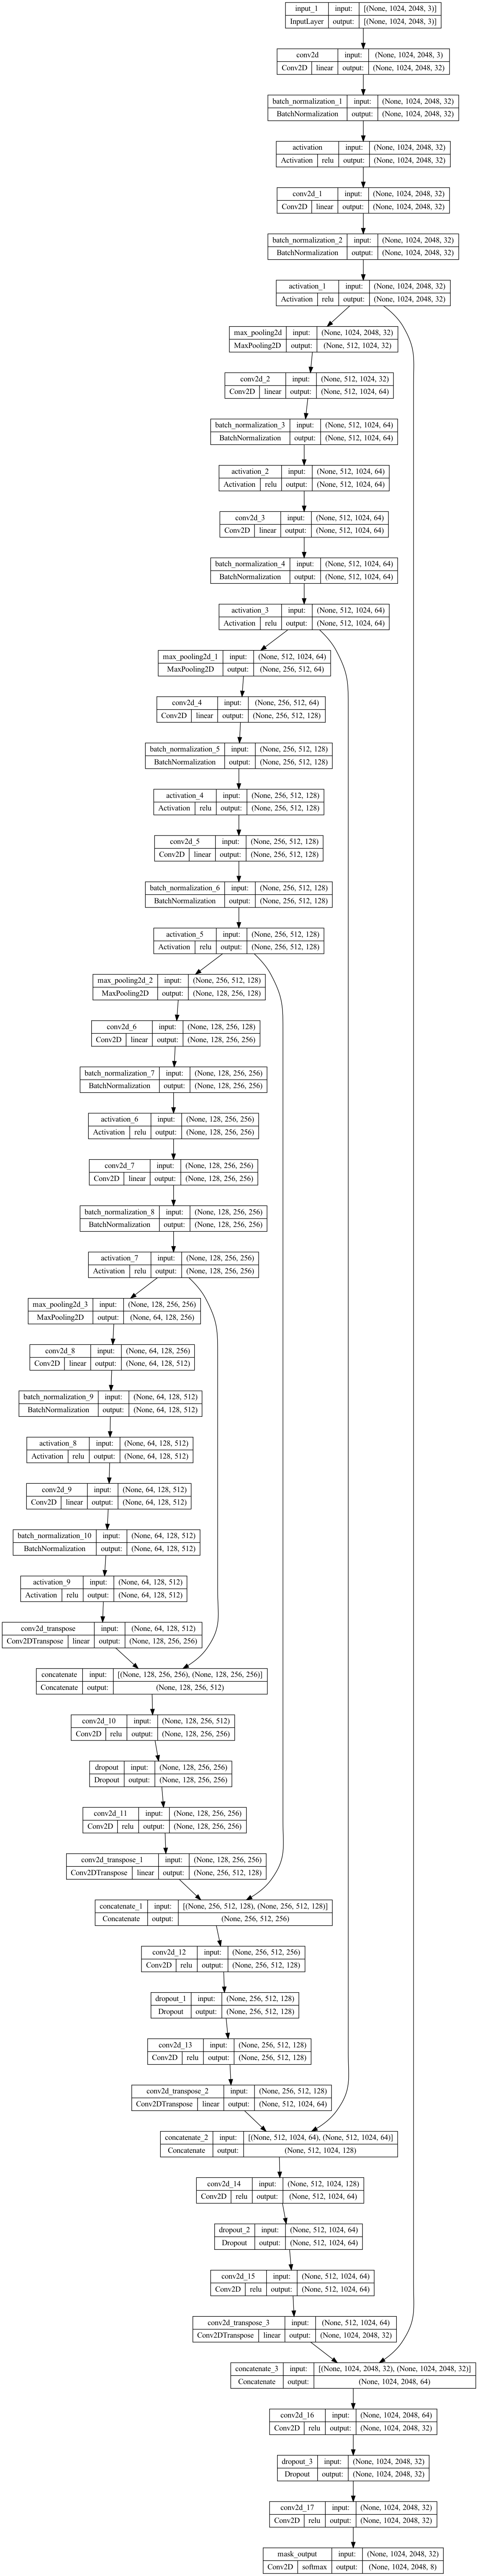

In [51]:
# Plotting the structure of the model and saving it as a PNG image.
plot_model(unit_model, to_file="UNetModel.png", 
           show_shapes=True, show_layer_activations=True)

In [52]:
ghjjhjhjhjh

NameError: name 'ghjjhjhjhjh' is not defined

<h4><div class="alert alert-block alert-warning" id="section_2B2">
2 - Training the model</div></h4>

Training your model with tf.data involves simply providing the model's fit function with your training/validation dataset, the number of steps, and epochs.

We also include a Model callback, ModelCheckpoint that will save the model to disk after each epoch. We configure it such that it only saves our highest performing model. Note that saving the model capture more than just the weights of the model: by default, it saves the model architecture, weights, as well as information about the training process such as the state of the optimizer, etc.

In [53]:
save_model_path = '/tmp/weights.hdf5'
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath=save_model_path, monitor='val_dice_loss', save_best_only=True, verbose=1)

Don't forget to specify our model callback in the fit function call.

In [ ]:
history = model.fit(train_ds, 
                    steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                    epochs=epochs,
                    validation_data=val_ds,
                    validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                    callbacks=[cp])

Visualize training process

In [ ]:
# print('size of int_train_lstm:', int_train_lstm.shape)
# print('size of y_train_lstm:', y_train_lstm.shape)
# print('size of int_val_lstm:', int_val_lstm.shape)
# print('size of y_val_lstm:', y_val_lstm.shape)

In [ ]:
# Visualization of the Training and Validation Accuracy.
accuracy_visu(hist_model)

In [ ]:
# Visualization of the Training and Validation Loss.
loss_visu(hist_model)

In [ ]:
# # Final evaluation of the model, calculating the accuracy on the testing dataset.
# _, acc = model_lstm1.evaluate(int_test_lstm, y_test_lstm)
# print(f"Testing accuracy: {acc:.3f}")

In [ ]:
dice = history.history['dice_loss']
val_dice = history.history['val_dice_loss']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, dice, label='Training Dice Loss')
plt.plot(epochs_range, val_dice, label='Validation Dice Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Dice Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Visualize actual performance

We'll visualize our performance on the validation set.

Note that in an actual setting (competition, deployment, etc.) we'd evaluate on the test set with the full image resolution.

To load our model we have two options:

Since our model architecture is already in memory, we can simply call load_weights(save_model_path)
If you wanted to load the model from scratch (in a different setting without already having the model architecture in memory) we simply call
model = models.load_model(save_model_path, custom_objects={'bce_dice_loss': bce_dice_loss, 'dice_loss': dice_loss}), specificing the necessary custom objects, loss and metrics, that we used to train our model.

If you want to see more examples, check our the keras guide!

In [ ]:
# Alternatively, load the weights directly: model.load_weights(save_model_path)
model = models.load_model(
    save_model_path, custom_objects={'bce_dice_loss': bce_dice_loss,
                                     'dice_loss': dice_loss})

In [ ]:
# Let's visualize some of the outputs 
data_aug_iter = val_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 20))
for i in range(5):
    batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
    img = batch_of_imgs[0]
    predicted_label = model.predict(batch_of_imgs)[0]

    plt.subplot(5, 3, 3 * i + 1)
    plt.imshow(img)
    plt.title("Input image")
  
    plt.subplot(5, 3, 3 * i + 2)
    plt.imshow(label[0, :, :, 0])
    plt.title("Actual Mask")
    plt.subplot(5, 3, 3 * i + 3)
    plt.imshow(predicted_label[:, :, 0])
    plt.title("Predicted Mask")
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()

<h4><div class="alert alert-block alert-warning" id="section_2B3">
3 - Making mask predictions</div></h4>

<h3><div class="alert alert-block alert-info" id="section_2C">
C - VGG-16 U-NET (vgg_unet)</div></h3>

<h4><div class="alert alert-block alert-warning" id="section_2C1">
1 - Building the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2C2">
2 - Training the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2C3">
3 - Making mask predictions</div></h4>

<h3><div class="alert alert-block alert-info" id="section_2D">
D - VGG-16 FCN32 (fcn_32_vgg)</div></h3>

FCN [12] (2014): Fully convolutional encoder structure (i.e., no fully connected layers) with skip connections that fuse multiscale activations at the final decision layer.    

<h4><div class="alert alert-block alert-warning" id="section_2D1">
1 - Building the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2D2">
2 - Training the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2D3">
3 - Making mask predictions</div></h4>

<h3><div class="alert alert-block alert-info" id="section_2E">
E - VGG-16 PSPNet (vgg_pspnet)</div></h3>

<h4><div class="alert alert-block alert-warning" id="section_2E1">
1 - Building the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2E2">
2 - Training the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2E3">
3 - Making mask predictions</div></h4>

<h3><div class="alert alert-block alert-info" id="section_2F">
F - VGG-16 Segnet (vgg_segnet)</div></h3>

Seg-Net [22] (2015): Encoder/decoder structure (similar to U-Net) with skip connections that transmit only pooling indices (unlike U-Net, for which skip connections concatenate same-level activations).

<h4><div class="alert alert-block alert-warning" id="section_2F1">
1 - Building the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2F2">
2 - Training the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2F3">
3 - Making mask predictions</div></h4>

<h3><div class="alert alert-block alert-info" id="section_2G">
G - Resnet-50 U-NET (resnet50_unet)</div></h3>

<h4><div class="alert alert-block alert-warning" id="section_2G1">
1 - Building the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2G2">
2 - Training the model</div></h4>

<h4><div class="alert alert-block alert-warning" id="section_2G3">
3 - Making mask predictions</div></h4>

<h2><div class="alert alert-block alert-success" id="section_3">
PART 3 - ?????????</div></h2>

<h3><div class="alert alert-block alert-info" id="section_3A">
A - HYPERPARAMETER TUNING</div></h3>

During training, some parameters must be considered to be altered in order to get the best performance of the network proposed regarding the problem to be solved and to modify the behavior of each layer. Typical ConvNets parameters are the following:<br>
• Batch size, the number of training images in one forward or backward pass.<br>
• Iterations, the number forward or backward of passes.<br>
• Epoch, measures how many times every image has been seen during training (i.e. one epoch means that every image has been seen once). It can be also understood as a one forward pass and one backward pass of all the training examples. It is numerically computed as:<br>
𝑒𝑝𝑜𝑐h𝑠 = Batch side * iterations / training images<br>
• Loss function, evaluates the penalty between the prediction and the ground truth label in every batch.<br>
• Learning rate, defines the step size for which the weights of a model are updated regarding the stochastic gradient descent.<br>
• Optimizer, to find the most optimal set of hyperparameters for the model (SGD, RMSprop and Adam...).

jouer sur optimizer, loss, metrics dans compile()

<h3><div class="alert alert-block alert-info" id="section_3B">
B - MODELS PERFORMANCE EVALUATION</div></h3>

|Model|IoU coef|Dice coef|Time (sec)|
|---|---|---|---|
|unet_mini|0.900|0.900|23.9|
|unet|0.900|0.900|23.9|
|vgg_unet|0.900|0.900|23.9|
|fcn_32_vgg|0.900|0.900|23.9|
|vgg_pspnet|0.900|0.900|23.9|
|vgg_segnet|0.900|0.900|23.9|
|resnet50_unet|0.900|0.900|23.9|

<h2><div class="alert alert-block alert-success" id="section_00">
CONCLUSION</div></h2>

<img src="img_notebook/future_vision_transport.png" width="250" height="250">

In [ ]:
# data_format: channels_last (default) corresponds to inputs with shape (batch_size, height, width, channels)
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255)(inputs)

# Encoder
conv1 = Conv2D(filters=num_filters, kernel_size=(3, 3), 
               strides=(1, 1), padding='same', # strides by default.
               activation='relu', kernel_initializer='he_normal', # "glorot_uniform" ?
               )(s)
conv1 = Dropout(0.1)(conv1)
conv1 = Conv2D(num_filters, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(num_filters*2, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Conv2D(num_filters*2, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

conv3 = Conv2D(num_filters*4, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Conv2D(num_filters*4, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)

conv4 = Conv2D(num_filters*8, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Conv2D(num_filters*8, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv4)
pool4 = MaxPooling2D((2, 2))(conv4)

conv5 = Conv2D(num_filters*16, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(pool4)
conv5 = Dropout(0.1)(conv5)
conv5 = Conv2D(num_filters*16, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv5)

# Decoder
trans_conv6 = Conv2DTranspose(num_filters*8, (2, 2), strides=(2, 2), padding='same')(conv5)
trans_conv6 = concatenate([trans_conv6, conv4])
conv6 = Conv2D(num_filters*8, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(trans_conv6)
conv6 = Dropout(0.2)(conv6)
conv6 = Conv2D(num_filters*8, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv6)

trans_conv7 = Conv2DTranspose(num_filters*4, (2, 2), strides=(2, 2), padding='same')(conv6)
trans_conv7 = concatenate([trans_conv7, conv3])
conv7 = Conv2D(num_filters*4, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(trans_conv7)
conv7 = Dropout(0.2)(conv7)
conv7 = Conv2D(num_filters*4, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv7)

trans_conv8 = Conv2DTranspose(num_filters*2, (2, 2), strides=(2, 2), padding='same')(conv7)
trans_conv8 = concatenate([trans_conv8, conv2])
conv8 = Conv2D(num_filters*2, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(trans_conv8)
conv8 = Dropout(0.1)(conv8)
conv8 = Conv2D(num_filters*2, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv8)

trans_conv9 = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(conv8)
trans_conv9 = concatenate([trans_conv9, conv1], axis=3)
conv9 = Conv2D(num_filters, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(trans_conv9)
conv9 = Dropout(0.1)(conv9)
conv9 = Conv2D(num_filters, (3, 3), activation='relu', 
               kernel_initializer='he_normal', 
               padding='same')(conv9)

outputs = Conv2D(8, (1, 1), activation='sigmoid')(conv9)

unit_model = Model(inputs=[inputs], outputs=[outputs])
unit_model.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])
# model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_loss])
unit_model.summary()